In [9]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold


from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [122]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    #data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
     #  'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
      # 'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m

#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    data_set = df.values
    return data_set
    
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0][0])-2]
    actual_y = data_set[:,len(data_set[0][0])-2:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)



def ROC_curve_generator():
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [38]:
data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')

In [77]:
#data_frame_m['IHD-HeartAttack']

In [78]:
#data_frame_834["no"] = []

In [124]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

798
798
798
598 200
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_53 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
Train on 598 samples, validate on 200 samples
Epoch 1/1000
 - 1s - loss: 0.2505 - acc: 0.5452 - val_loss: 0.2481 - val_acc: 0.6250
Epoch 2/1000
 - 0s - loss: 0.2482 - acc: 0.5886 - val_loss: 0.2466 - val_acc: 0.6250
Epoch 3/1000
 - 0s - loss: 0.2472 - acc: 0.5886 - val_loss: 0.2453 - val_acc: 0.6250
Epoch 4/1000
 - 0s - loss: 0.2465 - acc: 0.5886 - val_loss: 0.2439 - val_acc: 0.62

 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 88/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 89/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 90/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 91/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 92/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 93/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 94/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 95/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 96/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 97/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 98/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 

Epoch 182/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 183/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 184/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 185/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 186/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 187/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 188/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 189/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 190/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 191/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 192/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 193/1000
 - 0s - loss: 0.2422 - acc: 

 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 277/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 278/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 279/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 280/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 281/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 282/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 283/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 284/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 285/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 286/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 287/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_lo

Epoch 371/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 372/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 373/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 374/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 375/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 376/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2358 - val_acc: 0.6250
Epoch 377/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2358 - val_acc: 0.6250
Epoch 378/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 379/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 380/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 381/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 382/1000
 - 0s - loss: 0.2422 - acc: 

 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2358 - val_acc: 0.6250
Epoch 466/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 467/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 468/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 469/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 470/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 471/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 472/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 473/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2356 - val_acc: 0.6250
Epoch 474/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 475/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 476/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_lo

Epoch 560/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 561/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 562/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 563/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 564/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 565/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 566/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 567/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2358 - val_acc: 0.6250
Epoch 568/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 569/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 570/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 571/1000
 - 0s - loss: 0.2422 - acc: 

 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 655/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 656/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 657/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 658/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 659/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 660/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 661/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 662/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 663/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 664/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 665/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_lo

Epoch 749/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 750/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 751/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 752/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 753/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 754/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 755/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 756/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 757/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 758/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 759/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 760/1000
 - 0s - loss: 0.2422 - acc: 

 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 844/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 845/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 846/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 847/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 848/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 849/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 850/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 851/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 852/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 853/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 854/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_lo

Epoch 938/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 939/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2358 - val_acc: 0.6250
Epoch 940/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 941/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 942/1000
 - 0s - loss: 0.2421 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 943/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 944/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 945/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 946/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 947/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 948/1000
 - 0s - loss: 0.2422 - acc: 0.5886 - val_loss: 0.2357 - val_acc: 0.6250
Epoch 949/1000
 - 0s - loss: 0.2422 - acc: 

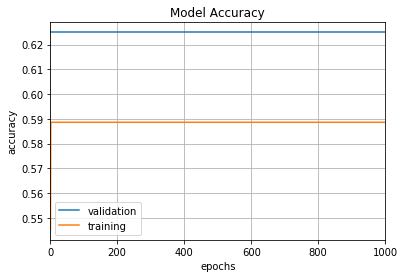

834
834
834
625 209
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_56 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 12        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________
None
Train on 625 samples, validate on 209 samples
Epoch 1/1000
 - 1s - loss: 0.2356 - acc: 0.5920 - val_loss: 0.2237 - val_acc: 0.6316
Epoch 2/1000
 - 0s - loss: 0.2279 - acc: 0.5920 - val_loss: 0.2167 - val_acc: 0.6316
Epoch 3/1000
 - 0s - loss: 0.2210 - acc: 0.5968 - val_loss: 0.2089 - val_acc: 0.6364
Epoch 4/1000
 - 0s - loss: 0.2134 - acc: 0.6112 - val_loss: 0.2031 - val_acc: 0.70

 - 0s - loss: 6.4863e-04 - acc: 1.0000 - val_loss: 6.8742e-04 - val_acc: 1.0000
Epoch 87/1000
 - 0s - loss: 6.2387e-04 - acc: 1.0000 - val_loss: 6.6075e-04 - val_acc: 1.0000
Epoch 88/1000
 - 0s - loss: 6.0296e-04 - acc: 1.0000 - val_loss: 6.4535e-04 - val_acc: 1.0000
Epoch 89/1000
 - 0s - loss: 5.8648e-04 - acc: 1.0000 - val_loss: 6.2597e-04 - val_acc: 1.0000
Epoch 90/1000
 - 0s - loss: 5.6527e-04 - acc: 1.0000 - val_loss: 6.0076e-04 - val_acc: 1.0000
Epoch 91/1000
 - 0s - loss: 5.4598e-04 - acc: 1.0000 - val_loss: 5.8404e-04 - val_acc: 1.0000
Epoch 92/1000
 - 0s - loss: 5.3395e-04 - acc: 1.0000 - val_loss: 5.7227e-04 - val_acc: 1.0000
Epoch 93/1000
 - 0s - loss: 5.1472e-04 - acc: 1.0000 - val_loss: 5.4757e-04 - val_acc: 1.0000
Epoch 94/1000
 - 0s - loss: 5.0660e-04 - acc: 1.0000 - val_loss: 5.4601e-04 - val_acc: 1.0000
Epoch 95/1000
 - 0s - loss: 4.9043e-04 - acc: 1.0000 - val_loss: 5.1610e-04 - val_acc: 1.0000
Epoch 96/1000
 - 0s - loss: 4.6810e-04 - acc: 1.0000 - val_loss: 5.1283e-0

Epoch 173/1000
 - 0s - loss: 8.6700e-05 - acc: 1.0000 - val_loss: 9.2475e-05 - val_acc: 1.0000
Epoch 174/1000
 - 0s - loss: 8.5575e-05 - acc: 1.0000 - val_loss: 9.0902e-05 - val_acc: 1.0000
Epoch 175/1000
 - 0s - loss: 8.3901e-05 - acc: 1.0000 - val_loss: 8.9426e-05 - val_acc: 1.0000
Epoch 176/1000
 - 0s - loss: 8.1917e-05 - acc: 1.0000 - val_loss: 8.7783e-05 - val_acc: 1.0000
Epoch 177/1000
 - 0s - loss: 8.0777e-05 - acc: 1.0000 - val_loss: 8.6356e-05 - val_acc: 1.0000
Epoch 178/1000
 - 0s - loss: 7.9171e-05 - acc: 1.0000 - val_loss: 8.4919e-05 - val_acc: 1.0000
Epoch 179/1000
 - 0s - loss: 7.8497e-05 - acc: 1.0000 - val_loss: 8.3376e-05 - val_acc: 1.0000
Epoch 180/1000
 - 0s - loss: 7.6459e-05 - acc: 1.0000 - val_loss: 8.2693e-05 - val_acc: 1.0000
Epoch 181/1000
 - 0s - loss: 7.5347e-05 - acc: 1.0000 - val_loss: 8.0594e-05 - val_acc: 1.0000
Epoch 182/1000
 - 0s - loss: 7.4500e-05 - acc: 1.0000 - val_loss: 7.9214e-05 - val_acc: 1.0000
Epoch 183/1000
 - 0s - loss: 7.2891e-05 - acc: 1.0

Epoch 260/1000
 - 0s - loss: 2.2564e-05 - acc: 1.0000 - val_loss: 2.4088e-05 - val_acc: 1.0000
Epoch 261/1000
 - 0s - loss: 2.2267e-05 - acc: 1.0000 - val_loss: 2.3747e-05 - val_acc: 1.0000
Epoch 262/1000
 - 0s - loss: 2.1962e-05 - acc: 1.0000 - val_loss: 2.3427e-05 - val_acc: 1.0000
Epoch 263/1000
 - 0s - loss: 2.1660e-05 - acc: 1.0000 - val_loss: 2.3101e-05 - val_acc: 1.0000
Epoch 264/1000
 - 0s - loss: 2.1368e-05 - acc: 1.0000 - val_loss: 2.2846e-05 - val_acc: 1.0000
Epoch 265/1000
 - 0s - loss: 2.1040e-05 - acc: 1.0000 - val_loss: 2.2461e-05 - val_acc: 1.0000
Epoch 266/1000
 - 0s - loss: 2.0742e-05 - acc: 1.0000 - val_loss: 2.2157e-05 - val_acc: 1.0000
Epoch 267/1000
 - 0s - loss: 2.0516e-05 - acc: 1.0000 - val_loss: 2.1836e-05 - val_acc: 1.0000
Epoch 268/1000
 - 0s - loss: 2.0274e-05 - acc: 1.0000 - val_loss: 2.1545e-05 - val_acc: 1.0000
Epoch 269/1000
 - 0s - loss: 1.9919e-05 - acc: 1.0000 - val_loss: 2.1250e-05 - val_acc: 1.0000
Epoch 270/1000
 - 0s - loss: 1.9621e-05 - acc: 1.0

Epoch 347/1000
 - 0s - loss: 7.1600e-06 - acc: 1.0000 - val_loss: 7.5499e-06 - val_acc: 1.0000
Epoch 348/1000
 - 0s - loss: 7.0168e-06 - acc: 1.0000 - val_loss: 7.4509e-06 - val_acc: 1.0000
Epoch 349/1000
 - 0s - loss: 6.9229e-06 - acc: 1.0000 - val_loss: 7.3570e-06 - val_acc: 1.0000
Epoch 350/1000
 - 0s - loss: 6.8392e-06 - acc: 1.0000 - val_loss: 7.2745e-06 - val_acc: 1.0000
Epoch 351/1000
 - 0s - loss: 6.7585e-06 - acc: 1.0000 - val_loss: 7.1773e-06 - val_acc: 1.0000
Epoch 352/1000
 - 0s - loss: 6.6551e-06 - acc: 1.0000 - val_loss: 7.0802e-06 - val_acc: 1.0000
Epoch 353/1000
 - 0s - loss: 6.6041e-06 - acc: 1.0000 - val_loss: 6.9928e-06 - val_acc: 1.0000
Epoch 354/1000
 - 0s - loss: 6.4952e-06 - acc: 1.0000 - val_loss: 6.9090e-06 - val_acc: 1.0000
Epoch 355/1000
 - 0s - loss: 6.4269e-06 - acc: 1.0000 - val_loss: 6.8154e-06 - val_acc: 1.0000
Epoch 356/1000
 - 0s - loss: 6.3620e-06 - acc: 1.0000 - val_loss: 6.7368e-06 - val_acc: 1.0000
Epoch 357/1000
 - 0s - loss: 6.2537e-06 - acc: 1.0

Epoch 434/1000
 - 0s - loss: 2.4085e-06 - acc: 1.0000 - val_loss: 2.5433e-06 - val_acc: 1.0000
Epoch 435/1000
 - 0s - loss: 2.3797e-06 - acc: 1.0000 - val_loss: 2.5124e-06 - val_acc: 1.0000
Epoch 436/1000
 - 0s - loss: 2.3608e-06 - acc: 1.0000 - val_loss: 2.4829e-06 - val_acc: 1.0000
Epoch 437/1000
 - 0s - loss: 2.3237e-06 - acc: 1.0000 - val_loss: 2.4512e-06 - val_acc: 1.0000
Epoch 438/1000
 - 0s - loss: 2.2959e-06 - acc: 1.0000 - val_loss: 2.4215e-06 - val_acc: 1.0000
Epoch 439/1000
 - 0s - loss: 2.2949e-06 - acc: 1.0000 - val_loss: 2.4024e-06 - val_acc: 1.0000
Epoch 440/1000
 - 0s - loss: 2.2400e-06 - acc: 1.0000 - val_loss: 2.3657e-06 - val_acc: 1.0000
Epoch 441/1000
 - 0s - loss: 2.2159e-06 - acc: 1.0000 - val_loss: 2.3338e-06 - val_acc: 1.0000
Epoch 442/1000
 - 0s - loss: 2.1846e-06 - acc: 1.0000 - val_loss: 2.3070e-06 - val_acc: 1.0000
Epoch 443/1000
 - 0s - loss: 2.1650e-06 - acc: 1.0000 - val_loss: 2.2802e-06 - val_acc: 1.0000
Epoch 444/1000
 - 0s - loss: 2.1400e-06 - acc: 1.0

Epoch 521/1000
 - 0s - loss: 8.4813e-07 - acc: 1.0000 - val_loss: 8.8632e-07 - val_acc: 1.0000
Epoch 522/1000
 - 0s - loss: 8.3721e-07 - acc: 1.0000 - val_loss: 8.7543e-07 - val_acc: 1.0000
Epoch 523/1000
 - 0s - loss: 8.2748e-07 - acc: 1.0000 - val_loss: 8.6555e-07 - val_acc: 1.0000
Epoch 524/1000
 - 0s - loss: 8.1896e-07 - acc: 1.0000 - val_loss: 8.5497e-07 - val_acc: 1.0000
Epoch 525/1000
 - 0s - loss: 8.0766e-07 - acc: 1.0000 - val_loss: 8.4444e-07 - val_acc: 1.0000
Epoch 526/1000
 - 0s - loss: 7.9792e-07 - acc: 1.0000 - val_loss: 8.3498e-07 - val_acc: 1.0000
Epoch 527/1000
 - 0s - loss: 7.8894e-07 - acc: 1.0000 - val_loss: 8.2457e-07 - val_acc: 1.0000
Epoch 528/1000
 - 0s - loss: 7.8042e-07 - acc: 1.0000 - val_loss: 8.1458e-07 - val_acc: 1.0000
Epoch 529/1000
 - 0s - loss: 7.7237e-07 - acc: 1.0000 - val_loss: 8.0479e-07 - val_acc: 1.0000
Epoch 530/1000
 - 0s - loss: 7.6308e-07 - acc: 1.0000 - val_loss: 7.9510e-07 - val_acc: 1.0000
Epoch 531/1000
 - 0s - loss: 7.5421e-07 - acc: 1.0

Epoch 608/1000
 - 0s - loss: 3.0338e-07 - acc: 1.0000 - val_loss: 3.1433e-07 - val_acc: 1.0000
Epoch 609/1000
 - 0s - loss: 3.0257e-07 - acc: 1.0000 - val_loss: 3.1048e-07 - val_acc: 1.0000
Epoch 610/1000
 - 0s - loss: 2.9783e-07 - acc: 1.0000 - val_loss: 3.0772e-07 - val_acc: 1.0000
Epoch 611/1000
 - 0s - loss: 2.9453e-07 - acc: 1.0000 - val_loss: 3.0354e-07 - val_acc: 1.0000
Epoch 612/1000
 - 0s - loss: 2.9099e-07 - acc: 1.0000 - val_loss: 3.0027e-07 - val_acc: 1.0000
Epoch 613/1000
 - 0s - loss: 2.8575e-07 - acc: 1.0000 - val_loss: 2.9622e-07 - val_acc: 1.0000
Epoch 614/1000
 - 0s - loss: 2.8307e-07 - acc: 1.0000 - val_loss: 2.9279e-07 - val_acc: 1.0000
Epoch 615/1000
 - 0s - loss: 2.7961e-07 - acc: 1.0000 - val_loss: 2.8922e-07 - val_acc: 1.0000
Epoch 616/1000
 - 0s - loss: 2.7652e-07 - acc: 1.0000 - val_loss: 2.8632e-07 - val_acc: 1.0000
Epoch 617/1000
 - 0s - loss: 2.7374e-07 - acc: 1.0000 - val_loss: 2.8236e-07 - val_acc: 1.0000
Epoch 618/1000
 - 0s - loss: 2.6987e-07 - acc: 1.0

Epoch 695/1000
 - 0s - loss: 1.1037e-07 - acc: 1.0000 - val_loss: 1.1275e-07 - val_acc: 1.0000
Epoch 696/1000
 - 0s - loss: 1.0939e-07 - acc: 1.0000 - val_loss: 1.1146e-07 - val_acc: 1.0000
Epoch 697/1000
 - 0s - loss: 1.0761e-07 - acc: 1.0000 - val_loss: 1.1021e-07 - val_acc: 1.0000
Epoch 698/1000
 - 0s - loss: 1.0641e-07 - acc: 1.0000 - val_loss: 1.0889e-07 - val_acc: 1.0000
Epoch 699/1000
 - 0s - loss: 1.0506e-07 - acc: 1.0000 - val_loss: 1.0755e-07 - val_acc: 1.0000
Epoch 700/1000
 - 0s - loss: 1.0382e-07 - acc: 1.0000 - val_loss: 1.0631e-07 - val_acc: 1.0000
Epoch 701/1000
 - 0s - loss: 1.0270e-07 - acc: 1.0000 - val_loss: 1.0507e-07 - val_acc: 1.0000
Epoch 702/1000
 - 0s - loss: 1.0139e-07 - acc: 1.0000 - val_loss: 1.0393e-07 - val_acc: 1.0000
Epoch 703/1000
 - 0s - loss: 1.0034e-07 - acc: 1.0000 - val_loss: 1.0267e-07 - val_acc: 1.0000
Epoch 704/1000
 - 0s - loss: 9.9340e-08 - acc: 1.0000 - val_loss: 1.0154e-07 - val_acc: 1.0000
Epoch 705/1000
 - 0s - loss: 9.8058e-08 - acc: 1.0

Epoch 782/1000
 - 0s - loss: 4.0419e-08 - acc: 1.0000 - val_loss: 4.0986e-08 - val_acc: 1.0000
Epoch 783/1000
 - 0s - loss: 3.9992e-08 - acc: 1.0000 - val_loss: 4.0490e-08 - val_acc: 1.0000
Epoch 784/1000
 - 0s - loss: 3.9497e-08 - acc: 1.0000 - val_loss: 4.0044e-08 - val_acc: 1.0000
Epoch 785/1000
 - 0s - loss: 3.9030e-08 - acc: 1.0000 - val_loss: 3.9585e-08 - val_acc: 1.0000
Epoch 786/1000
 - 0s - loss: 3.8587e-08 - acc: 1.0000 - val_loss: 3.9136e-08 - val_acc: 1.0000
Epoch 787/1000
 - 0s - loss: 3.8251e-08 - acc: 1.0000 - val_loss: 3.8730e-08 - val_acc: 1.0000
Epoch 788/1000
 - 0s - loss: 3.7675e-08 - acc: 1.0000 - val_loss: 3.8217e-08 - val_acc: 1.0000
Epoch 789/1000
 - 0s - loss: 3.7292e-08 - acc: 1.0000 - val_loss: 3.7845e-08 - val_acc: 1.0000
Epoch 790/1000
 - 0s - loss: 3.6839e-08 - acc: 1.0000 - val_loss: 3.7378e-08 - val_acc: 1.0000
Epoch 791/1000
 - 0s - loss: 3.6406e-08 - acc: 1.0000 - val_loss: 3.6946e-08 - val_acc: 1.0000
Epoch 792/1000
 - 0s - loss: 3.6052e-08 - acc: 1.0

Epoch 869/1000
 - 0s - loss: 1.4982e-08 - acc: 1.0000 - val_loss: 1.5039e-08 - val_acc: 1.0000
Epoch 870/1000
 - 0s - loss: 1.4808e-08 - acc: 1.0000 - val_loss: 1.4875e-08 - val_acc: 1.0000
Epoch 871/1000
 - 0s - loss: 1.4685e-08 - acc: 1.0000 - val_loss: 1.4722e-08 - val_acc: 1.0000
Epoch 872/1000
 - 0s - loss: 1.4461e-08 - acc: 1.0000 - val_loss: 1.4546e-08 - val_acc: 1.0000
Epoch 873/1000
 - 0s - loss: 1.4354e-08 - acc: 1.0000 - val_loss: 1.4383e-08 - val_acc: 1.0000
Epoch 874/1000
 - 0s - loss: 1.4160e-08 - acc: 1.0000 - val_loss: 1.4219e-08 - val_acc: 1.0000
Epoch 875/1000
 - 0s - loss: 1.4023e-08 - acc: 1.0000 - val_loss: 1.4053e-08 - val_acc: 1.0000
Epoch 876/1000
 - 0s - loss: 1.3853e-08 - acc: 1.0000 - val_loss: 1.3901e-08 - val_acc: 1.0000
Epoch 877/1000
 - 0s - loss: 1.3694e-08 - acc: 1.0000 - val_loss: 1.3732e-08 - val_acc: 1.0000
Epoch 878/1000
 - 0s - loss: 1.3530e-08 - acc: 1.0000 - val_loss: 1.3576e-08 - val_acc: 1.0000
Epoch 879/1000
 - 0s - loss: 1.3395e-08 - acc: 1.0

Epoch 956/1000
 - 0s - loss: 5.6825e-09 - acc: 1.0000 - val_loss: 5.6404e-09 - val_acc: 1.0000
Epoch 957/1000
 - 0s - loss: 5.5976e-09 - acc: 1.0000 - val_loss: 5.5801e-09 - val_acc: 1.0000
Epoch 958/1000
 - 0s - loss: 5.5653e-09 - acc: 1.0000 - val_loss: 5.5131e-09 - val_acc: 1.0000
Epoch 959/1000
 - 0s - loss: 5.4954e-09 - acc: 1.0000 - val_loss: 5.4553e-09 - val_acc: 1.0000
Epoch 960/1000
 - 0s - loss: 5.4419e-09 - acc: 1.0000 - val_loss: 5.3971e-09 - val_acc: 1.0000
Epoch 961/1000
 - 0s - loss: 5.3899e-09 - acc: 1.0000 - val_loss: 5.3365e-09 - val_acc: 1.0000
Epoch 962/1000
 - 0s - loss: 5.3195e-09 - acc: 1.0000 - val_loss: 5.2757e-09 - val_acc: 1.0000
Epoch 963/1000
 - 0s - loss: 5.2672e-09 - acc: 1.0000 - val_loss: 5.2158e-09 - val_acc: 1.0000
Epoch 964/1000
 - 0s - loss: 5.2032e-09 - acc: 1.0000 - val_loss: 5.1646e-09 - val_acc: 1.0000
Epoch 965/1000
 - 0s - loss: 5.1416e-09 - acc: 1.0000 - val_loss: 5.1046e-09 - val_acc: 1.0000
Epoch 966/1000
 - 0s - loss: 5.0865e-09 - acc: 1.0

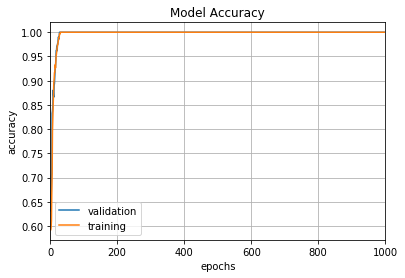

835
835
835
626 209
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 7)                 119       
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 12        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None
Train on 626 samples, validate on 209 samples
Epoch 1/1000
 - 1s - loss: 0.2502 - acc: 0.4665 - val_loss: 0.2453 - val_acc: 0.7177
Epoch 2/1000
 - 0s - loss: 0.2414 - acc: 0.6965 - val_loss: 0.2374 - val_acc: 0.7225
Epoch 3/1000
 - 0s - loss: 0.2317 - acc: 0.7572 - val_loss: 0.2265 - val_acc: 0.7751
Epoch 4/1000
 - 0s - loss: 0.2185 - acc: 0.7939 - val_loss: 0.2143 - val_acc: 0.85

 - 0s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 88/1000
 - 0s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 89/1000
 - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 90/1000
 - 0s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 91/1000
 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 92/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 93/1000
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 94/1000
 - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 95/1000
 - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 96/1000
 - 0s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 97/1000
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 98/1000
 - 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0050 

Epoch 182/1000
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 183/1000
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 184/1000
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 185/1000
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 186/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 187/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 188/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 189/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 190/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 191/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 192/1000
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 193/1000
 - 0s - loss: 0.0010 - acc: 

Epoch 270/1000
 - 0s - loss: 3.9484e-04 - acc: 1.0000 - val_loss: 4.1480e-04 - val_acc: 1.0000
Epoch 271/1000
 - 0s - loss: 3.9078e-04 - acc: 1.0000 - val_loss: 4.0979e-04 - val_acc: 1.0000
Epoch 272/1000
 - 0s - loss: 3.8586e-04 - acc: 1.0000 - val_loss: 4.0459e-04 - val_acc: 1.0000
Epoch 273/1000
 - 0s - loss: 3.8114e-04 - acc: 1.0000 - val_loss: 3.9962e-04 - val_acc: 1.0000
Epoch 274/1000
 - 0s - loss: 3.7653e-04 - acc: 1.0000 - val_loss: 3.9572e-04 - val_acc: 1.0000
Epoch 275/1000
 - 0s - loss: 3.7231e-04 - acc: 1.0000 - val_loss: 3.9058e-04 - val_acc: 1.0000
Epoch 276/1000
 - 0s - loss: 3.6817e-04 - acc: 1.0000 - val_loss: 3.8603e-04 - val_acc: 1.0000
Epoch 277/1000
 - 0s - loss: 3.6369e-04 - acc: 1.0000 - val_loss: 3.8173e-04 - val_acc: 1.0000
Epoch 278/1000
 - 0s - loss: 3.5935e-04 - acc: 1.0000 - val_loss: 3.7699e-04 - val_acc: 1.0000
Epoch 279/1000
 - 0s - loss: 3.5520e-04 - acc: 1.0000 - val_loss: 3.7282e-04 - val_acc: 1.0000
Epoch 280/1000
 - 0s - loss: 3.5098e-04 - acc: 1.0

Epoch 357/1000
 - 0s - loss: 1.4688e-04 - acc: 1.0000 - val_loss: 1.5416e-04 - val_acc: 1.0000
Epoch 358/1000
 - 0s - loss: 1.4529e-04 - acc: 1.0000 - val_loss: 1.5245e-04 - val_acc: 1.0000
Epoch 359/1000
 - 0s - loss: 1.4370e-04 - acc: 1.0000 - val_loss: 1.5079e-04 - val_acc: 1.0000
Epoch 360/1000
 - 0s - loss: 1.4213e-04 - acc: 1.0000 - val_loss: 1.4928e-04 - val_acc: 1.0000
Epoch 361/1000
 - 0s - loss: 1.4076e-04 - acc: 1.0000 - val_loss: 1.4757e-04 - val_acc: 1.0000
Epoch 362/1000
 - 0s - loss: 1.3903e-04 - acc: 1.0000 - val_loss: 1.4586e-04 - val_acc: 1.0000
Epoch 363/1000
 - 0s - loss: 1.3754e-04 - acc: 1.0000 - val_loss: 1.4434e-04 - val_acc: 1.0000
Epoch 364/1000
 - 0s - loss: 1.3595e-04 - acc: 1.0000 - val_loss: 1.4315e-04 - val_acc: 1.0000
Epoch 365/1000
 - 0s - loss: 1.3468e-04 - acc: 1.0000 - val_loss: 1.4117e-04 - val_acc: 1.0000
Epoch 366/1000
 - 0s - loss: 1.3305e-04 - acc: 1.0000 - val_loss: 1.4003e-04 - val_acc: 1.0000
Epoch 367/1000
 - 0s - loss: 1.3176e-04 - acc: 1.0

Epoch 444/1000
 - 0s - loss: 5.7210e-05 - acc: 1.0000 - val_loss: 6.0088e-05 - val_acc: 1.0000
Epoch 445/1000
 - 0s - loss: 5.6602e-05 - acc: 1.0000 - val_loss: 5.9446e-05 - val_acc: 1.0000
Epoch 446/1000
 - 0s - loss: 5.5996e-05 - acc: 1.0000 - val_loss: 5.8812e-05 - val_acc: 1.0000
Epoch 447/1000
 - 0s - loss: 5.5407e-05 - acc: 1.0000 - val_loss: 5.8273e-05 - val_acc: 1.0000
Epoch 448/1000
 - 0s - loss: 5.4827e-05 - acc: 1.0000 - val_loss: 5.7516e-05 - val_acc: 1.0000
Epoch 449/1000
 - 0s - loss: 5.4251e-05 - acc: 1.0000 - val_loss: 5.6900e-05 - val_acc: 1.0000
Epoch 450/1000
 - 0s - loss: 5.3660e-05 - acc: 1.0000 - val_loss: 5.6353e-05 - val_acc: 1.0000
Epoch 451/1000
 - 0s - loss: 5.3088e-05 - acc: 1.0000 - val_loss: 5.5697e-05 - val_acc: 1.0000
Epoch 452/1000
 - 0s - loss: 5.2521e-05 - acc: 1.0000 - val_loss: 5.5138e-05 - val_acc: 1.0000
Epoch 453/1000
 - 0s - loss: 5.1993e-05 - acc: 1.0000 - val_loss: 5.4563e-05 - val_acc: 1.0000
Epoch 454/1000
 - 0s - loss: 5.1450e-05 - acc: 1.0

Epoch 531/1000
 - 0s - loss: 2.2738e-05 - acc: 1.0000 - val_loss: 2.3917e-05 - val_acc: 1.0000
Epoch 532/1000
 - 0s - loss: 2.2511e-05 - acc: 1.0000 - val_loss: 2.3640e-05 - val_acc: 1.0000
Epoch 533/1000
 - 0s - loss: 2.2264e-05 - acc: 1.0000 - val_loss: 2.3387e-05 - val_acc: 1.0000
Epoch 534/1000
 - 0s - loss: 2.2039e-05 - acc: 1.0000 - val_loss: 2.3145e-05 - val_acc: 1.0000
Epoch 535/1000
 - 0s - loss: 2.1806e-05 - acc: 1.0000 - val_loss: 2.2889e-05 - val_acc: 1.0000
Epoch 536/1000
 - 0s - loss: 2.1593e-05 - acc: 1.0000 - val_loss: 2.2658e-05 - val_acc: 1.0000
Epoch 537/1000
 - 0s - loss: 2.1382e-05 - acc: 1.0000 - val_loss: 2.2429e-05 - val_acc: 1.0000
Epoch 538/1000
 - 0s - loss: 2.1129e-05 - acc: 1.0000 - val_loss: 2.2173e-05 - val_acc: 1.0000
Epoch 539/1000
 - 0s - loss: 2.0905e-05 - acc: 1.0000 - val_loss: 2.1983e-05 - val_acc: 1.0000
Epoch 540/1000
 - 0s - loss: 2.0675e-05 - acc: 1.0000 - val_loss: 2.1722e-05 - val_acc: 1.0000
Epoch 541/1000
 - 0s - loss: 2.0469e-05 - acc: 1.0

Epoch 618/1000
 - 0s - loss: 9.1304e-06 - acc: 1.0000 - val_loss: 9.5867e-06 - val_acc: 1.0000
Epoch 619/1000
 - 0s - loss: 9.0384e-06 - acc: 1.0000 - val_loss: 9.4923e-06 - val_acc: 1.0000
Epoch 620/1000
 - 0s - loss: 8.9456e-06 - acc: 1.0000 - val_loss: 9.3891e-06 - val_acc: 1.0000
Epoch 621/1000
 - 0s - loss: 8.8534e-06 - acc: 1.0000 - val_loss: 9.2925e-06 - val_acc: 1.0000
Epoch 622/1000
 - 0s - loss: 8.7672e-06 - acc: 1.0000 - val_loss: 9.1891e-06 - val_acc: 1.0000
Epoch 623/1000
 - 0s - loss: 8.6728e-06 - acc: 1.0000 - val_loss: 9.0983e-06 - val_acc: 1.0000
Epoch 624/1000
 - 0s - loss: 8.5850e-06 - acc: 1.0000 - val_loss: 9.0121e-06 - val_acc: 1.0000
Epoch 625/1000
 - 0s - loss: 8.4885e-06 - acc: 1.0000 - val_loss: 8.9039e-06 - val_acc: 1.0000
Epoch 626/1000
 - 0s - loss: 8.4025e-06 - acc: 1.0000 - val_loss: 8.8143e-06 - val_acc: 1.0000
Epoch 627/1000
 - 0s - loss: 8.3307e-06 - acc: 1.0000 - val_loss: 8.7275e-06 - val_acc: 1.0000
Epoch 628/1000
 - 0s - loss: 8.2541e-06 - acc: 1.0

Epoch 705/1000
 - 0s - loss: 3.6879e-06 - acc: 1.0000 - val_loss: 3.8673e-06 - val_acc: 1.0000
Epoch 706/1000
 - 0s - loss: 3.6507e-06 - acc: 1.0000 - val_loss: 3.8295e-06 - val_acc: 1.0000
Epoch 707/1000
 - 0s - loss: 3.6124e-06 - acc: 1.0000 - val_loss: 3.7913e-06 - val_acc: 1.0000
Epoch 708/1000
 - 0s - loss: 3.5748e-06 - acc: 1.0000 - val_loss: 3.7505e-06 - val_acc: 1.0000
Epoch 709/1000
 - 0s - loss: 3.5389e-06 - acc: 1.0000 - val_loss: 3.7138e-06 - val_acc: 1.0000
Epoch 710/1000
 - 0s - loss: 3.5021e-06 - acc: 1.0000 - val_loss: 3.6741e-06 - val_acc: 1.0000
Epoch 711/1000
 - 0s - loss: 3.4642e-06 - acc: 1.0000 - val_loss: 3.6377e-06 - val_acc: 1.0000
Epoch 712/1000
 - 0s - loss: 3.4271e-06 - acc: 1.0000 - val_loss: 3.6002e-06 - val_acc: 1.0000
Epoch 713/1000
 - 0s - loss: 3.3971e-06 - acc: 1.0000 - val_loss: 3.5601e-06 - val_acc: 1.0000
Epoch 714/1000
 - 0s - loss: 3.3623e-06 - acc: 1.0000 - val_loss: 3.5248e-06 - val_acc: 1.0000
Epoch 715/1000
 - 0s - loss: 3.3249e-06 - acc: 1.0

Epoch 792/1000
 - 0s - loss: 1.4942e-06 - acc: 1.0000 - val_loss: 1.5674e-06 - val_acc: 1.0000
Epoch 793/1000
 - 0s - loss: 1.4787e-06 - acc: 1.0000 - val_loss: 1.5522e-06 - val_acc: 1.0000
Epoch 794/1000
 - 0s - loss: 1.4645e-06 - acc: 1.0000 - val_loss: 1.5347e-06 - val_acc: 1.0000
Epoch 795/1000
 - 0s - loss: 1.4496e-06 - acc: 1.0000 - val_loss: 1.5196e-06 - val_acc: 1.0000
Epoch 796/1000
 - 0s - loss: 1.4335e-06 - acc: 1.0000 - val_loss: 1.5043e-06 - val_acc: 1.0000
Epoch 797/1000
 - 0s - loss: 1.4186e-06 - acc: 1.0000 - val_loss: 1.4879e-06 - val_acc: 1.0000
Epoch 798/1000
 - 0s - loss: 1.4037e-06 - acc: 1.0000 - val_loss: 1.4749e-06 - val_acc: 1.0000
Epoch 799/1000
 - 0s - loss: 1.3899e-06 - acc: 1.0000 - val_loss: 1.4572e-06 - val_acc: 1.0000
Epoch 800/1000
 - 0s - loss: 1.3755e-06 - acc: 1.0000 - val_loss: 1.4437e-06 - val_acc: 1.0000
Epoch 801/1000
 - 0s - loss: 1.3611e-06 - acc: 1.0000 - val_loss: 1.4288e-06 - val_acc: 1.0000
Epoch 802/1000
 - 0s - loss: 1.3467e-06 - acc: 1.0

Epoch 879/1000
 - 0s - loss: 6.0758e-07 - acc: 1.0000 - val_loss: 6.3746e-07 - val_acc: 1.0000
Epoch 880/1000
 - 0s - loss: 6.0183e-07 - acc: 1.0000 - val_loss: 6.3112e-07 - val_acc: 1.0000
Epoch 881/1000
 - 0s - loss: 5.9534e-07 - acc: 1.0000 - val_loss: 6.2480e-07 - val_acc: 1.0000
Epoch 882/1000
 - 0s - loss: 5.8920e-07 - acc: 1.0000 - val_loss: 6.1812e-07 - val_acc: 1.0000
Epoch 883/1000
 - 0s - loss: 5.8380e-07 - acc: 1.0000 - val_loss: 6.1258e-07 - val_acc: 1.0000
Epoch 884/1000
 - 0s - loss: 5.7754e-07 - acc: 1.0000 - val_loss: 6.0541e-07 - val_acc: 1.0000
Epoch 885/1000
 - 0s - loss: 5.7135e-07 - acc: 1.0000 - val_loss: 5.9900e-07 - val_acc: 1.0000
Epoch 886/1000
 - 0s - loss: 5.6529e-07 - acc: 1.0000 - val_loss: 5.9383e-07 - val_acc: 1.0000
Epoch 887/1000
 - 0s - loss: 5.6002e-07 - acc: 1.0000 - val_loss: 5.8676e-07 - val_acc: 1.0000
Epoch 888/1000
 - 0s - loss: 5.5388e-07 - acc: 1.0000 - val_loss: 5.8128e-07 - val_acc: 1.0000
Epoch 889/1000
 - 0s - loss: 5.4835e-07 - acc: 1.0

Epoch 966/1000
 - 0s - loss: 2.4927e-07 - acc: 1.0000 - val_loss: 2.6096e-07 - val_acc: 1.0000
Epoch 967/1000
 - 0s - loss: 2.4641e-07 - acc: 1.0000 - val_loss: 2.5785e-07 - val_acc: 1.0000
Epoch 968/1000
 - 0s - loss: 2.4360e-07 - acc: 1.0000 - val_loss: 2.5563e-07 - val_acc: 1.0000
Epoch 969/1000
 - 0s - loss: 2.4112e-07 - acc: 1.0000 - val_loss: 2.5290e-07 - val_acc: 1.0000
Epoch 970/1000
 - 0s - loss: 2.3852e-07 - acc: 1.0000 - val_loss: 2.5030e-07 - val_acc: 1.0000
Epoch 971/1000
 - 0s - loss: 2.3625e-07 - acc: 1.0000 - val_loss: 2.4792e-07 - val_acc: 1.0000
Epoch 972/1000
 - 0s - loss: 2.3381e-07 - acc: 1.0000 - val_loss: 2.4523e-07 - val_acc: 1.0000
Epoch 973/1000
 - 0s - loss: 2.3140e-07 - acc: 1.0000 - val_loss: 2.4249e-07 - val_acc: 1.0000
Epoch 974/1000
 - 0s - loss: 2.2902e-07 - acc: 1.0000 - val_loss: 2.4036e-07 - val_acc: 1.0000
Epoch 975/1000
 - 0s - loss: 2.2675e-07 - acc: 1.0000 - val_loss: 2.3808e-07 - val_acc: 1.0000
Epoch 976/1000
 - 0s - loss: 2.2443e-07 - acc: 1.0

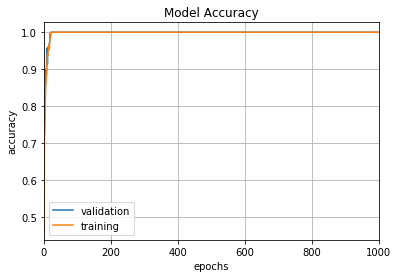

In [123]:
for i in range(len(data_frame_name_list)):
    if (i == 0):
        data_frame = read_csv_798()
    elif (i == 1):
        data_frame = read_csv_834()
    elif (i == 2):
        data_frame = read_csv_835()
    
    data_set = create_data_set(data_frame)
    X_train, Y_train,X_test,Y_test = split_data(data_set)
    model = ann_model(len(X_train[0]))
    
    print(model.summary())
    model.compile(loss=losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                  metrics=['accuracy'])
    history1 = model.fit(X_train, Y_train, 
                         validation_data=(X_test,
                                          Y_test), 
                         epochs=epochs, 
                         batch_size=batch_size,
                         verbose=2)
    plot_fig(1, history1)
    
    #print(data_frame.head())
    #break

798
798
798
-----------iiiiiiiiii----- 1 -------------iiiiiiiiii------------------------
-----------------optimizer no  1 ---------------------------------------
-----------------loss function no  1 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_143 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_144 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 5s - loss: 0.2448 - acc: 0.5920 - val_loss: 0.2400 - val_acc: 0.5650
Epoch 2/5
 - 0s - loss: 0.2337 - acc

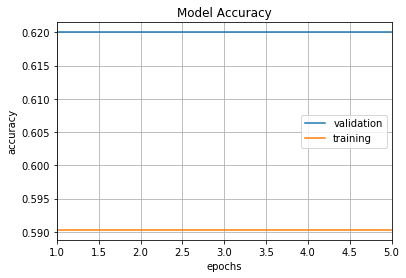

-----------------loss function no  2 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_146 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_147 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 5s - loss: 0.4066 - acc: 0.5920 - val_loss: 0.3845 - val_acc: 0.6150
Epoch 2/5
 - 0s - loss: 0.4060 - acc: 0.5920 - val_loss: 0.3843 - val_acc: 0.6150
Epoch 3/5
 - 0s - loss: 0.4059 - acc: 0.5920 - val_loss: 0.3842 - val_acc: 0.6150
Epoch 4/5
 - 0s - loss: 0.4058 - a

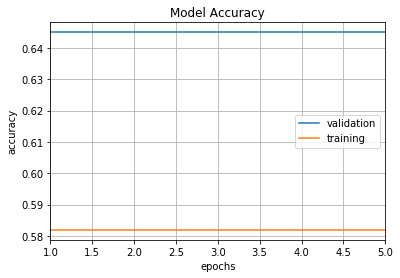

-----------------loss function no  3 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_149 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_150 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 5s - loss: 203354293.6455 - acc: 0.6003 - val_loss: 205000035.2000 - val_acc: 0.5900
Epoch 2/5
 - 0s - loss: 199832801.3378 - acc: 0.6003 - val_loss: 205000035.2000 - val_acc: 0.5900
Epoch 3/5
 - 0s - loss: 199832807.3579 - acc: 0.6003 - val_loss: 205000035.2000 - va

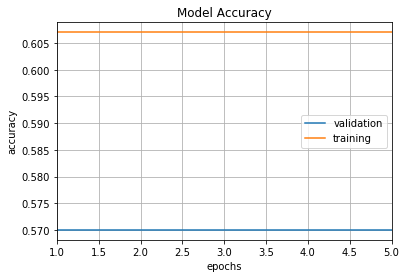

-----------------loss function no  4 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_152 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_153 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 5s - loss: 0.1343 - acc: 0.5870 - val_loss: 0.1264 - val_acc: 0.5500
Epoch 2/5
 - 0s - loss: 0.1259 - acc: 0.5619 - val_loss: 0.1235 - val_acc: 0.5500
Epoch 3/5
 - 0s - loss: 0.1232 - acc: 0.6154 - val_loss: 0.1234 - val_acc: 0.5500
Epoch 4/5
 - 0s - loss: 0.1214 - a

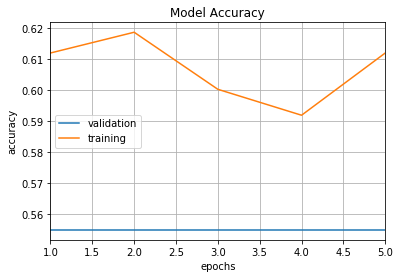

-----------------loss function no  5 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_155 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_156 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 6s - loss: 0.6192 - acc: 0.6003 - val_loss: 0.6246 - val_acc: 0.5600
Epoch 2/5
 - 0s - loss: 0.6169 - acc: 0.6104 - val_loss: 0.6258 - val_acc: 0.5600
Epoch 3/5
 - 0s - loss: 0.6168 - acc: 0.6104 - val_loss: 0.6261 - val_acc: 0.5600
Epoch 4/5
 - 0s - loss: 0.6168 - a

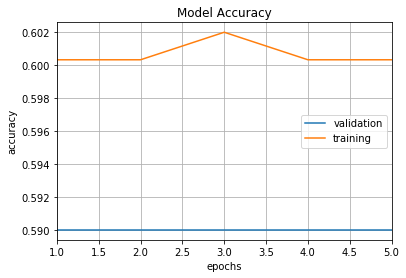

-----------------loss function no  6 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_158 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_159 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 6s - loss: 0.7499 - acc: 0.6070 - val_loss: 0.7498 - val_acc: 0.5700
Epoch 2/5
 - 0s - loss: 0.7496 - acc: 0.6070 - val_loss: 0.7496 - val_acc: 0.5700
Epoch 3/5
 - 0s - loss: 0.7493 - acc: 0.6070 - val_loss: 0.7494 - val_acc: 0.5700
Epoch 4/5
 - 0s - loss: 0.7490 - a

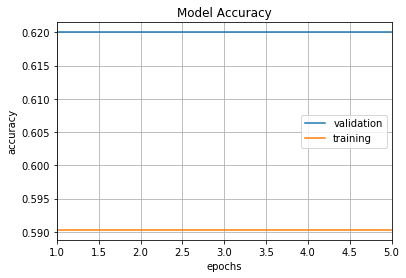

-----------------loss function no  7 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_161 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_162 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 6s - loss: 0.8981 - acc: 0.6254 - val_loss: 0.9593 - val_acc: 0.5150
Epoch 2/5
 - 0s - loss: 0.7628 - acc: 0.6254 - val_loss: 0.9607 - val_acc: 0.5150
Epoch 3/5
 - 0s - loss: 0.7509 - acc: 0.6254 - val_loss: 0.9626 - val_acc: 0.5150
Epoch 4/5
 - 0s - loss: 0.7489 - a

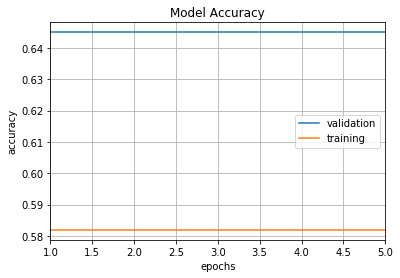

-----------------loss function no  8 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_164 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_165 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 6s - loss: 0.1134 - acc: 0.5987 - val_loss: 0.1137 - val_acc: 0.5950
Epoch 2/5
 - 0s - loss: 0.1146 - acc: 0.5786 - val_loss: 0.1119 - val_acc: 0.5950
Epoch 3/5
 - 0s - loss: 0.1140 - acc: 0.5987 - val_loss: 0.1124 - val_acc: 0.5950
Epoch 4/5
 - 0s - loss: 0.1147 - a

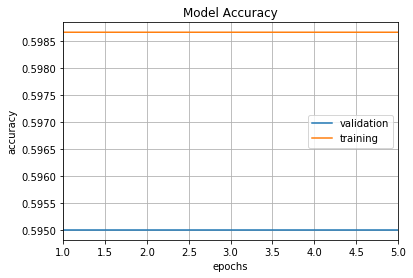

-----------------loss function no  9 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_167 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_168 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200
Train on 598 samples, validate on 200 samples
Epoch 1/5
 - 7s - loss: 0.6945 - acc: 0.5953 - val_loss: 0.6889 - val_acc: 0.6150
Epoch 2/5
 - 0s - loss: 0.6887 - acc: 0.5920 - val_loss: 0.6857 - val_acc: 0.6150
Epoch 3/5
 - 0s - loss: 0.6864 - acc: 0.5920 - val_loss: 0.6831 - val_acc: 0.6150
Epoch 4/5
 - 0s - loss: 0.6846 - a

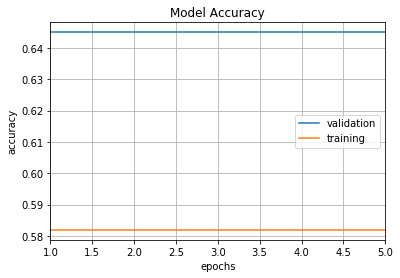

-----------------loss function no  10 -------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_170 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_171 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
598 200


ValueError: Error when checking target: expected dense_171 to have shape (1,) but got array with shape (2,)

In [127]:
for i in range(len(data_frame_name_list)):
    if (i == 0):
        data_frame = read_csv_798()
    elif (i == 1):
        data_frame = read_csv_834()
    elif (i == 2):
        data_frame = read_csv_835()
    input_size = len(data_frame.columns)-2
    print("-----------data set-----",i+1,"-------------data set------------------------")
    for j in range(len(keras_optimizers)):
        print("-----------------optimizer no ",j+1,"---------------------------------------")
        for k in range(len(keras_loss)):
            print("-----------------loss function no ",k+1,"-------------------------------")
            model = ann_model(input_size)
            print(model.summary())
            
            for l in range(5):
                data_set = create_data_set(data_frame)
                X_train, Y_train,X_test,Y_test = split_data(data_set)

                model.compile(loss=keras_loss[k],
                              optimizer=keras_optimizers[i],
                              metrics=['accuracy'])
                history1 = model.fit(X_train, Y_train, 
                                     validation_data=(X_test,
                                                      Y_test), 
                                     epochs=epochs, 
                                     batch_size=batch_size,
                                     verbose=2)
            plot_fig(1, history1)
    
    #print(data_frame.head())
    #break

In [119]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [120]:
for i in range(len(X_train)):
    print(X_train[i])

[ 0.8         2.22554093  1.10517092  1.10517092  1.10517092  1.10517092
  2.71828183  1.64872127  1.10517092  1.10517092  1.10517092  1.10517092
  1.10517092  1.10517092 23.        ]
[ 0.9         2.22554093  1.64872127  1.10517092  1.10517092  1.10517092
  2.71828183  2.71828183  1.10517092  1.10517092  2.71828183  1.10517092
  1.10517092  2.71828183 24.        ]
[ 1.3         1.8221188   1.10517092  2.71828183  1.10517092  2.71828183
  1.64872127  2.71828183  2.71828183  1.10517092  2.71828183  2.71828183
  1.10517092  1.10517092 26.        ]
[ 1.          2.22554093  1.10517092  2.71828183  1.10517092  1.10517092
  2.71828183  2.71828183  2.71828183  1.10517092  2.71828183  2.71828183
  1.10517092  2.71828183 25.        ]
[ 0.92        1.8221188   1.10517092  2.71828183  1.10517092  1.10517092
  2.71828183  2.71828183  2.71828183  1.10517092  1.10517092  2.71828183
  2.71828183  2.71828183 23.        ]
[ 0.96        1.8221188   1.10517092  1.10517092  2.71828183  1.10517092
  2.718

  1.10517092  1.10517092 26.        ]
[ 0.96        2.22554093  1.10517092  2.71828183  1.10517092  2.71828183
  2.71828183  2.71828183  2.71828183  1.10517092  2.71828183  1.10517092
  1.10517092  1.10517092 27.        ]
[ 1.68        2.22554093  1.10517092  2.71828183  1.10517092  1.10517092
  2.71828183  2.71828183  2.71828183  2.71828183  1.10517092  1.10517092
  1.10517092  1.10517092 28.        ]
[ 1.1         2.22554093  1.64872127  1.10517092  1.10517092  2.71828183
  2.71828183  2.71828183  2.71828183  2.71828183  2.71828183  1.10517092
  1.10517092  1.10517092 31.        ]
[ 0.9         2.22554093  1.64872127  1.10517092  1.10517092  1.10517092
  2.71828183  2.71828183  1.10517092  1.10517092  1.10517092  2.71828183
  2.71828183  2.71828183 22.        ]
[ 0.94        2.22554093  1.10517092  1.10517092  1.10517092  1.10517092
  2.71828183  2.71828183  1.10517092  1.10517092  2.71828183  2.71828183
  1.10517092  2.71828183 21.        ]
[ 1.1         2.22554093  1.10517092  1.10

In [121]:
len(X_train[i])

15

In [88]:
model.compile(loss=keras_loss[0],
              optimizer=keras_optimizers[0],
              metrics=['accuracy'])